In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
import io
import math 
from google.colab import files

In [3]:
def describe_helper(series):
    splits = str(series.describe()).split()
    keys, values = "", ""
    for i in range(0, len(splits), 2):
        keys += "{:8}\n".format(splits[i])
        values += "{:>8}\n".format(splits[i+1])
    return keys, values

In [4]:
def fps_analysis(dir=None, filename="lcam_fps.csv"):

  if dir:
    for dirname, dirnames, filenames in os.walk(dir):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname, subdirname)
 
            for filename in os.listdir(subject_path):
                abs_path = "%s/%s" % (subject_path, filename)
                df = pd.read_csv(abs_path)
                # create the histgram for visualization
                fig, ax = plt.subplots()
                plt.hist(df["fps"], bins=50)
                plt.title("Analysis for {}".format(abs_path))
                plt.figtext(.95, .49, describe_helper(pd.Series(df["fps"]))[0], {'multialignment':'left'})
                plt.figtext(1.05, .49, describe_helper(pd.Series(df["fps"]))[1], {'multialignment':'right'})

  else:
    df = pd.read_csv(filename)
    # create the histgram for visualization
    fig, ax = plt.subplots()
    plt.hist(df["fps"], bins=50)
    plt.title("Analysis for {}".format(filename))
    plt.figtext(.95, .49, describe_helper(pd.Series(df["fps"]))[0], {'multialignment':'left'})
    plt.figtext(1.05, .49, describe_helper(pd.Series(df["fps"]))[1], {'multialignment':'right'})


In [5]:
def get_df(filename):
  return pd.read_csv(filename)

In [6]:
def get_composite_top_graph(df):
  # plotting figures by creating axes object
  # using subplots() function
  figure, ax = plt.subplots()

  # using the twinx() for creating another
  # axes object for secondary y-Axis
  ax2 = ax.twinx()

  df["cpu(%)"].plot(ax=ax)
  df["memory(Mb)"].plot(ax=ax2, ls="--", color="orange")

  # giving labels to each y axis
  ax.set_ylabel('CPU %')
  ax2.set_ylabel('Mem(Mb)')
  # add the plot title
  plt.title("cpu-mem usage over time")

In [7]:
def get_cpu_usage_plot(df):
  df["cpu(%)"].plot(title="CPU Load Usage")
  plt.ylabel('CPU %')
  plt.figtext(.95, .49, describe_helper(pd.Series(df["cpu(%)"]))[0], {'multialignment':'left'})
  plt.figtext(1.05, .49, describe_helper(pd.Series(df["cpu(%)"]))[1], {'multialignment':'right'})

In [8]:
def get_mem_usage_plot(df):
  df["memory(Mb)"].plot(title="Memory Usage")
  plt.ylabel("memory(Mb)")
  plt.figtext(.95, .49, describe_helper(pd.Series(df["memory(Mb)"]))[0], {'multialignment':'left'})
  plt.figtext(1.05, .49, describe_helper(pd.Series(df["memory(Mb)"]))[1], {'multialignment':'right'})

In [9]:
def get_gpu_usage_plot(df):
  df["GPU"].plot(title="GPU Load Usage")
  plt.ylabel('GPU %')
  plt.figtext(.95, .49, describe_helper(pd.Series(df["GPU"]))[0], {'multialignment':'left'})
  plt.figtext(1.05, .49, describe_helper(pd.Series(df["GPU"]))[1], {'multialignment':'right'})

In [10]:
def get_gpu_temp_plot(df):
  df["Temp_GPU"].plot(title="GPU Temperature")
  plt.ylabel('GPU Temp(C)')
  plt.figtext(.95, .49, describe_helper(pd.Series(df["Temp_GPU"]))[0], {'multialignment':'left'})
  plt.figtext(1.05, .49, describe_helper(pd.Series(df["Temp_GPU"]))[1], {'multialignment':'right'})

### **GPU version analysis**

In [11]:
gpu_df = get_df("gpu/gpu_log.csv")

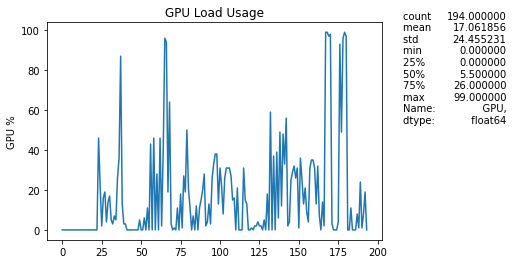

In [12]:
get_gpu_usage_plot(gpu_df)

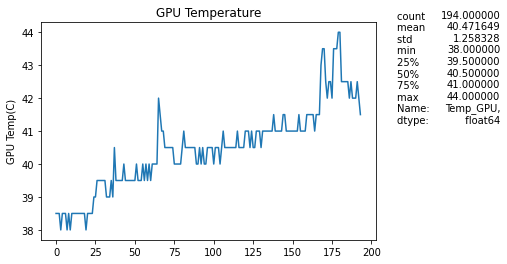

In [13]:
get_gpu_temp_plot(gpu_df)

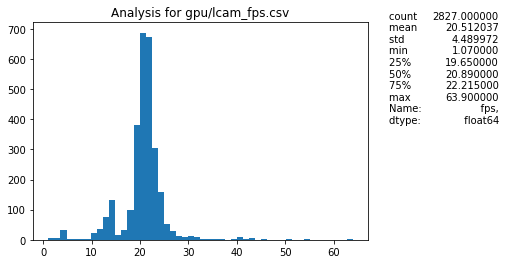

In [31]:
fps_analysis(filename="gpu/lcam_fps.csv")

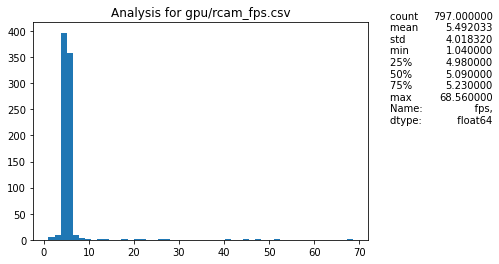

In [32]:
fps_analysis(filename="gpu/rcam_fps.csv")

In [17]:
df = get_df("gpu/top.csv")

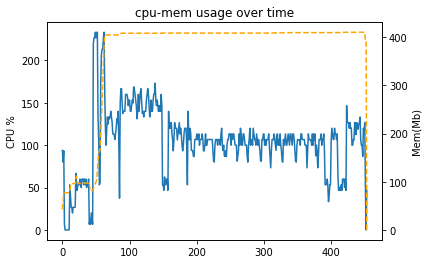

In [18]:
get_composite_top_graph(df)

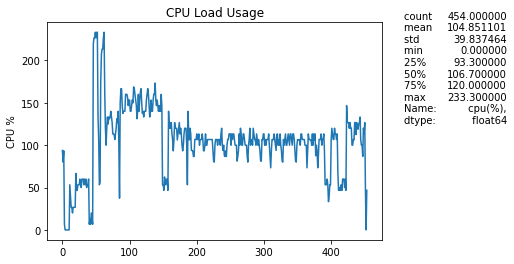

In [19]:
get_cpu_usage_plot(df)

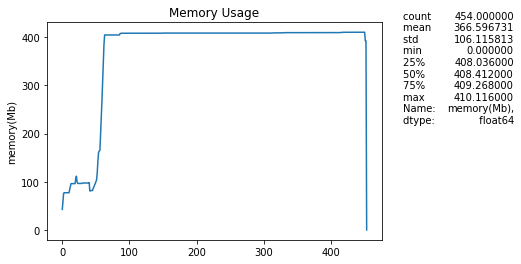

In [20]:
get_mem_usage_plot(df)

###**CPU Version Analysis**

In [21]:
gpu_df = get_df("cpu/gpu_log.csv")

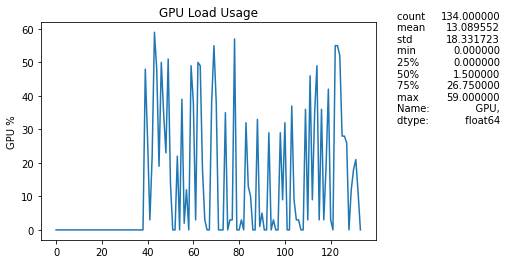

In [22]:
get_gpu_usage_plot(gpu_df)

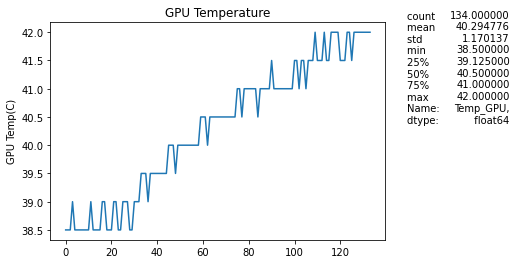

In [23]:
get_gpu_temp_plot(gpu_df)

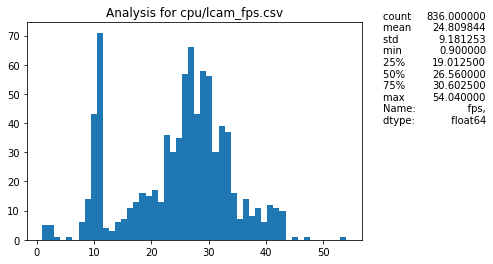

In [24]:
fps_analysis(filename="cpu/lcam_fps.csv")

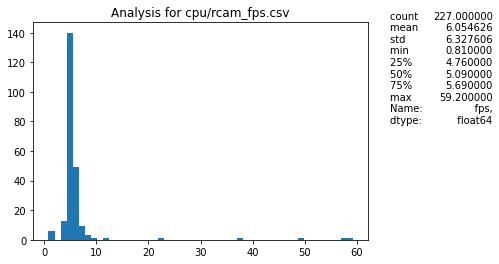

In [28]:
fps_analysis(filename="cpu/rcam_fps.csv")

In [26]:
df = get_df("cpu/top.csv")

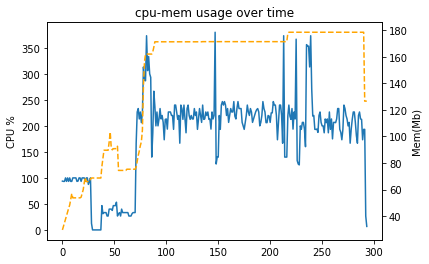

In [27]:
get_composite_top_graph(df)

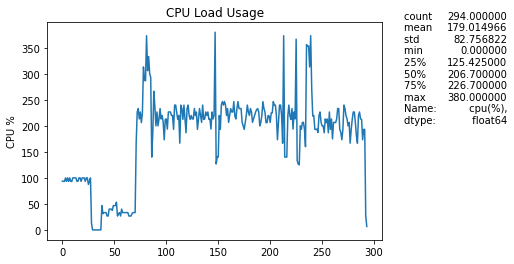

In [29]:
get_cpu_usage_plot(df)

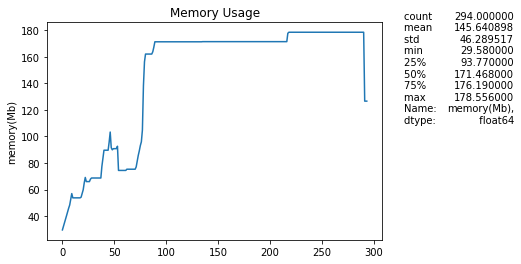

In [30]:
get_mem_usage_plot(df)